In [11]:
BiocManager::install("gplots")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Installing package(s) 'gplots'

also installing the dependencies ‘gtools’, ‘caTools’





The downloaded binary packages are in
	/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T//RtmpQKhseS/downloaded_packages


Old packages: 'BiocParallel', 'cli', 'curl', 'formatR', 'GenomeInfoDb',
  'highr', 'htmlwidgets', 'httpuv', 'locfit', 'purrr', 'ragg', 'repr',
  'RSQLite', 'statmod', 'stringi', 'survival', 'timechange', 'xfun'



In [1]:
library(edgeR)
library (lattice)
library (snpStats)
library (tidyverse)
library(EnhancedVolcano)
library(VennDiagram)
library(gplots)
library(dplyr)

library(fgsea)
library(data.table)
library(ggplot2)
library(Rcpp)

counts = read.delim('counts_matrix_KO_Control.csv', row.names = 1, sep = ',')
head(counts)
names(counts)

Loading required package: limma

Loading required package: survival

Loading required package: Matrix

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
Loading required package: ggrepel

Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘gplots’


The following object i

,D0.12.3,D0.8.1,D0.28.3,D0.12.1,D0.G.1,D0.G.3,D0.G.2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,2,3,2,4,4,4,3
ENSG00000227232.5,200,136,151,195,199,174,195
ENSG00000278267.1,0,0,0,0,0,0,0
ENSG00000243485.5,0,0,0,0,0,0,0
ENSG00000284332.1,0,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0,0,0


[1] "D0.12.3" "D0.8.1"  "D0.28.3" "D0.12.1" "D0.G.1"  "D0.G.3"  "D0.G.2"

In [2]:
d0 = DGEList(counts)
d0 = calcNormFactors(d0)
head(d0)

cutoff = 1
drop = which(apply(cpm(d0), 1, max) < cutoff)
d = d0[-drop,] 
dim(d) # number of genes left
print(d)

An object of class "DGEList"
$counts
                  D0.12.3 D0.8.1 D0.28.3 D0.12.1 D0.G.1 D0.G.3 D0.G.2
ENSG00000223972.5       2      3       2       4      4      4      3
ENSG00000227232.5     200    136     151     195    199    174    195
ENSG00000278267.1       0      0       0       0      0      0      0
ENSG00000243485.5       0      0       0       0      0      0      0
ENSG00000284332.1       0      0       0       0      0      0      0
ENSG00000237613.2       0      0       0       0      0      0      0

$samples
        group lib.size norm.factors
D0.12.3     1 58267975    0.9981805
D0.8.1      1 59353588    1.0087708
D0.28.3     1 57315557    1.0086019
D0.12.1     1 47176164    0.9993322
D0.G.1      1 55271940    0.9999894
D0.G.3      1 57301069    0.9921812
D0.G.2      1 56382333    0.9930757

[1] 14354     7

An object of class "DGEList"
$counts
                  D0.12.3 D0.8.1 D0.28.3 D0.12.1 D0.G.1 D0.G.3 D0.G.2
ENSG00000227232.5     200    136     151     195    199    174    195
ENSG00000279457.4     284    282     208     225    284    312    228
ENSG00000225972.1    1128    643     802    1167    784    734    965
ENSG00000225630.1    1928   1398    1521    2028   1442   1637   1859
ENSG00000237973.1   13127   9470   10499   14625  10132  11545  12922
14349 more rows ...

$samples
        group lib.size norm.factors
D0.12.3     1 58267975    0.9981805
D0.8.1      1 59353588    1.0087708
D0.28.3     1 57315557    1.0086019
D0.12.1     1 47176164    0.9993322
D0.G.1      1 55271940    0.9999894
D0.G.3      1 57301069    0.9921812
D0.G.2      1 56382333    0.9930757



In [3]:
sample_description = read.delim('sample_descriptions_KO_Control.csv', sep = ',')
sample_description

Sample,Treatment,Days,Background,KO_Guide
<chr>,<chr>,<int>,<chr>,<chr>
D0-12-3,Pretx,0,KO,12
D0-8-1,Pretx,0,KO,8
D0-28-3,Pretx,0,KO,28
D0-12-1,Pretx,0,KO,12
D0-G-1,Pretx,0,Control,G
D0-G-3,Pretx,0,Control,G
D0-G-2,Pretx,0,Control,G


[1] Pretx.KO      Pretx.KO      Pretx.KO      Pretx.KO      Pretx.Control
[6] Pretx.Control Pretx.Control
Levels: Pretx.Control Pretx.KO
[1] Pretx.0.KO      Pretx.0.KO      Pretx.0.KO      Pretx.0.KO     
[5] Pretx.0.Control Pretx.0.Control Pretx.0.Control
Levels: Pretx.0.Control Pretx.0.KO
[1] Pretx.0.12 Pretx.0.8  Pretx.0.28 Pretx.0.12 Pretx.0.G  Pretx.0.G  Pretx.0.G 
Levels: Pretx.0.12 Pretx.0.28 Pretx.0.8 Pretx.0.G


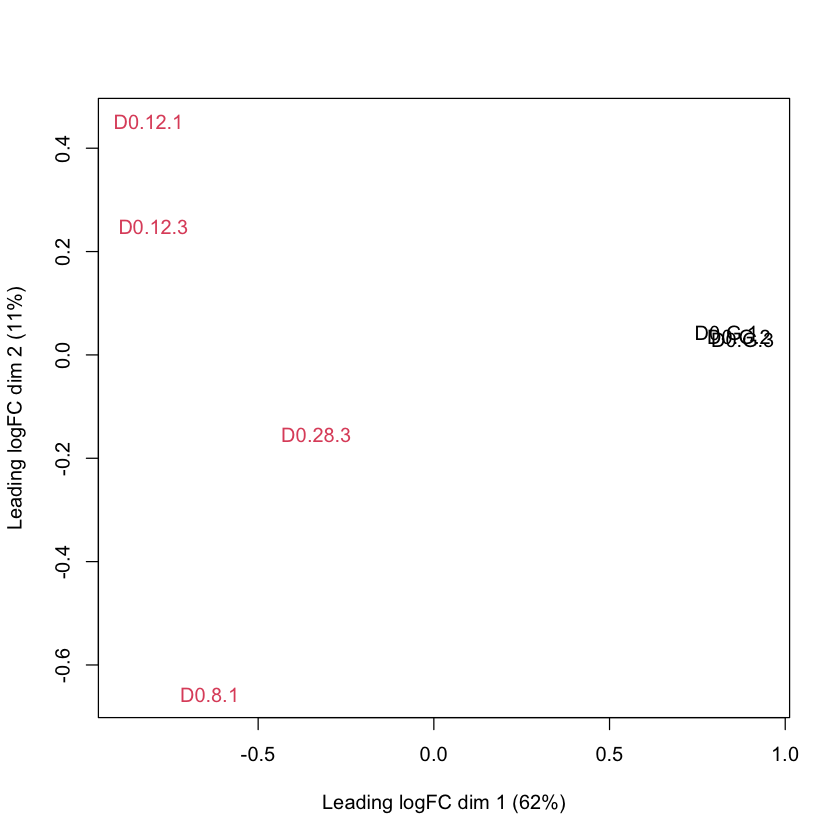

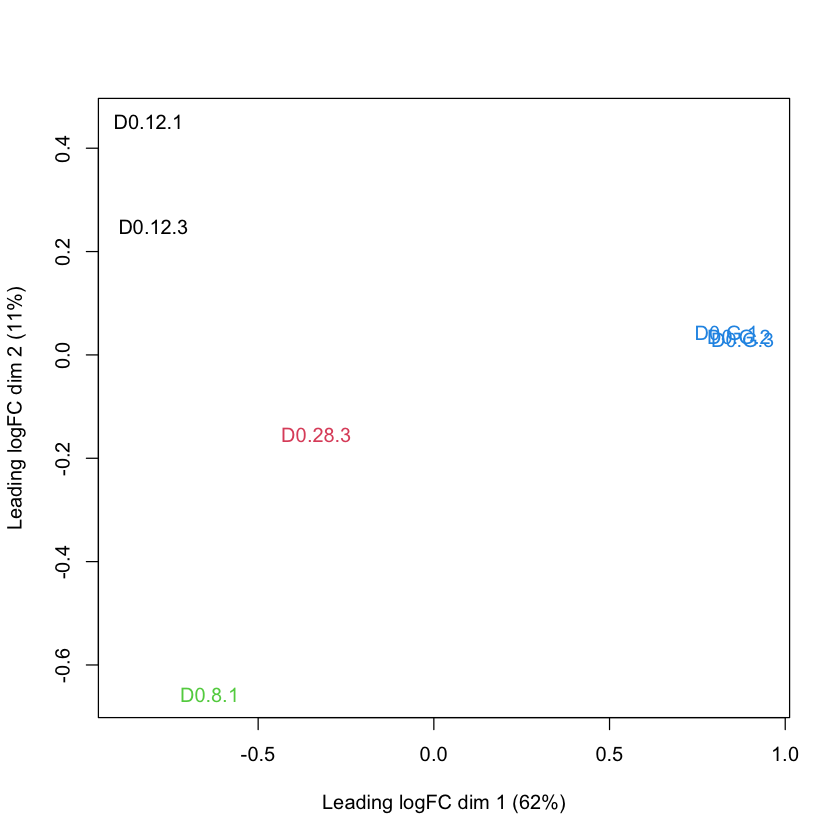

In [4]:
#denoted tb, group treatment and background. fulv.Control or palbo.KO
group_treatment_background=interaction(sample_description$Treatment,sample_description$Background)
print(group_treatment_background)

plotMDS(d, col = as.numeric(group_treatment_background))



#denoted tdb, group treatment and days and background. fulv.0.control or palbo.16.KO
group_treatment_days_background = interaction(sample_description$Treatment,sample_description$Days,sample_description$Background)
print(group_treatment_days_background)

plotMDS(d, col = as.numeric(group_treatment_days_background))

#denoted tdg, group treatment and days and guide. fulv.0.12 or palbo.16.G
group_treatment_days_guide = interaction(sample_description$Treatment,sample_description$Days,sample_description$KO_Guide)
print(group_treatment_days_guide)

plotMDS(d, col = as.numeric(group_treatment_days_guide))





,grouping_tdbPretx.0.Control,grouping_tdbPretx.0.KO
ENSG00000227232.5,1.756831,1.581529
ENSG00000279457.4,2.284249,2.155806
ENSG00000225972.1,3.874888,4.002993
ENSG00000225630.1,4.869605,4.916537
ENSG00000237973.1,7.678326,7.719442
ENSG00000229344.1,6.304919,6.347772
,grouping_tdbPretx.0.Control,grouping_tdbPretx.0.KO
ENSG00000227232.5,0.12280460,0.11190515
ENSG00000279457.4,0.10390522,0.09382165
ENSG00000225972.1,0.06337341,0.05251130


[1] "grouping_tdbPretx.0.Control" "grouping_tdbPretx.0.KO"     


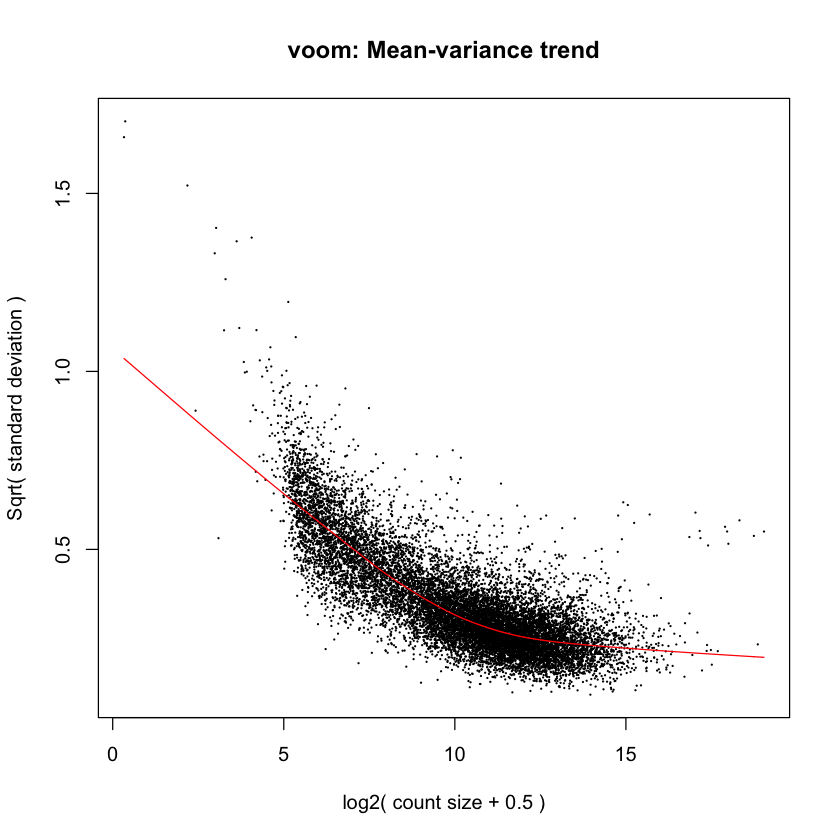

In [5]:
grouping_tdb = group_treatment_days_background


mm_tdb = model.matrix(~0 + grouping_tdb)
y_tdb = voom(d, mm_tdb, plot = T)

fit_tdb = lmFit(y_tdb,mm_tdb)
head(fit_tdb)

print(colnames(coef(fit_tdb)))
contrast_group_ko_c= makeContrasts(grouping_tdbPretx.0.KO - grouping_tdbPretx.0.Control, levels = colnames(coef(fit_tdb)))




In [6]:
#contrast
contrastFunction = function(fit_object, contrast_object){
  tmp = contrasts.fit(fit_object, contrast_object)
  tmp = eBayes(tmp)
  top.table = topTable(tmp, sort.by = 'logFC', n = Inf)
  head(top.table, 50)
  qqunif.plot(top.table$P.Val)
  hist(top.table$P.Val)
  print(paste0('number gene adj.p.val <.05 = ', length(which(top.table$adj.P.Val <.05))))

  df = as.data.frame(top.table)
  
  #replace add genename to esng
  gene_name_df <- read.csv('name_description.csv', sep = ',')

  df$gene_name = gene_name_df$Description[match(row.names(df), gene_name_df$Name)]
  return(df)
}



#qqplot
qqunif.plot<-function(pvalues, 
	should.thin=T, thin.obs.places=2, thin.exp.places=2, 
	xlab=expression(paste("Expected (",-log[10], " p-value)")),
	ylab=expression(paste("Observed (",-log[10], " p-value)")), 
	draw.conf=TRUE, conf.points=1000, conf.col="lightgray", conf.alpha=.05,
	already.transformed=FALSE, pch=20, aspect="iso", prepanel=prepanel.qqunif,
	par.settings=list(superpose.symbol=list(pch=pch)), ...) {
	
	
	#error checking
	if (length(pvalues)==0) stop("pvalue vector is empty, can't draw plot")
	if(!(class(pvalues)=="numeric" || 
		(class(pvalues)=="list" && all(sapply(pvalues, class)=="numeric"))))
		stop("pvalue vector is not numeric, can't draw plot")
	if (any(is.na(unlist(pvalues)))) stop("pvalue vector contains NA values, can't draw plot")
	if (already.transformed==FALSE) {
		if (any(unlist(pvalues)==0)) stop("pvalue vector contains zeros, can't draw plot")
	} else {
		if (any(unlist(pvalues)<0)) stop("-log10 pvalue vector contains negative values, can't draw plot")
	}
	
	
	grp<-NULL
	n<-1
	exp.x<-c()
	if(is.list(pvalues)) {
		nn<-sapply(pvalues, length)
		rs<-cumsum(nn)
		re<-rs-nn+1
		n<-min(nn)
		if (!is.null(names(pvalues))) {
			grp=factor(rep(names(pvalues), nn), levels=names(pvalues))
			names(pvalues)<-NULL
		} else {
			grp=factor(rep(1:length(pvalues), nn))
		}
		pvo<-pvalues
		pvalues<-numeric(sum(nn))
		exp.x<-numeric(sum(nn))
		for(i in 1:length(pvo)) {
			if (!already.transformed) {
				pvalues[rs[i]:re[i]] <- -log10(pvo[[i]])
				exp.x[rs[i]:re[i]] <- -log10((rank(pvo[[i]], ties.method="first")-.5)/nn[i])
			} else {
				pvalues[rs[i]:re[i]] <- pvo[[i]]
				exp.x[rs[i]:re[i]] <- -log10((nn[i]+1-rank(pvo[[i]], ties.method="first")-.5)/(nn[i]+1))
			}
		}
	} else {
		n <- length(pvalues)+1
		if (!already.transformed) {
			exp.x <- -log10((rank(pvalues, ties.method="first")-.5)/n)
			pvalues <- -log10(pvalues)
		} else {
			exp.x <- -log10((n-rank(pvalues, ties.method="first")-.5)/n)
		}
	}


	#this is a helper function to draw the confidence interval
	panel.qqconf<-function(n, conf.points=1000, conf.col="gray", conf.alpha=.05, ...) {
		require(grid)
		conf.points = min(conf.points, n-1);
		mpts<-matrix(nrow=conf.points*2, ncol=2)
        	for(i in seq(from=1, to=conf.points)) {
            		mpts[i,1]<- -log10((i-.5)/n)
            		mpts[i,2]<- -log10(qbeta(1-conf.alpha/2, i, n-i))
            		mpts[conf.points*2+1-i,1]<- -log10((i-.5)/n)
            		mpts[conf.points*2+1-i,2]<- -log10(qbeta(conf.alpha/2, i, n-i))
        	}
        	grid.polygon(x=mpts[,1],y=mpts[,2], gp=gpar(fill=conf.col, lty=0), default.units="native")
    	}

	#reduce number of points to plot
	if (should.thin==T) {
		if (!is.null(grp)) {
			thin <- unique(data.frame(pvalues = round(pvalues, thin.obs.places),
				exp.x = round(exp.x, thin.exp.places),
				grp=grp))
			grp = thin$grp
		} else {
			thin <- unique(data.frame(pvalues = round(pvalues, thin.obs.places),
				exp.x = round(exp.x, thin.exp.places)))
		}
		pvalues <- thin$pvalues
		exp.x <- thin$exp.x
	}
	gc()
	
	prepanel.qqunif= function(x,y,...) {
		A = list()
		A$xlim = range(x)*1.02
		A$xlim[1]=0
		A$ylim = range(y)*1.02
		A$ylim[1] = 0
		return(A)
	}

	#draw the plot
	xyplot(pvalues~exp.x, groups=grp, xlab=xlab, ylab=ylab, aspect=aspect,
		prepanel=prepanel, scales=list(axs="i"), pch=pch,
		panel = function(x, y, ...) {
			if (draw.conf) {
				panel.qqconf(n, conf.points=conf.points, 
					conf.col=conf.col, conf.alpha=conf.alpha)
			};
			panel.xyplot(x,y, ...);
			panel.abline(0,1);
		}, par.settings=par.settings, ...
	)
}


In [7]:
#volcano plot
plotVolcano = function(df, select_lab, title= NULL,keyvals= NULL){
  EnhancedVolcano(df, lab = df$gene_name, selectLab = select_lab, x = 'logFC', y = 'adj.P.Val',xlim = c(min(df[['logFC']], na.rm = TRUE) - .5, max(df[['logFC']], na.rm = TRUE) +
    .5),
  ylim = c(0, max(-log10(df[['adj.P.Val']]), na.rm = TRUE) + .5),FCcutoff = .001,pCutoff = 1, cutoffLineType = 'blank' ,legendPosition = 'right',drawConnectors =TRUE,widthConnectors = 0.3, pointSize = 1.5, labSize = 3.0, maxoverlapsConnectors = 50, title = title,colCustom = keyvals )
}


gsea_res = function(ranked_df_object, pathway_object){
  set.seed(42)
  fgseaRes = fgsea(pathways = pathway_object, stats = ranked_df_object, minSize = 15, maxSize = 500, eps = 0)
  topPathwaysUp = fgseaRes[ES > 0][head(order(pval), n=Inf),]
  topPathwaysDown = fgseaRes[ES < 0][head(order(pval), n=Inf),]
  topPathwaysUp_pathways = fgseaRes[ES > 0][head(order(pval), n=10),pathway]
  topPathwaysDown_pathways = fgseaRes[ES < 0][head(order(pval), n=10),pathway]
  topPathwaysAll = c(topPathwaysUp_pathways, rev(topPathwaysDown_pathways))
  
  new_list = list(topPathwaysUp, topPathwaysDown, topPathwaysAll, fgseaRes)
  return(new_list)
    
}

[1] "number gene adj.p.val <.05 = 1978"


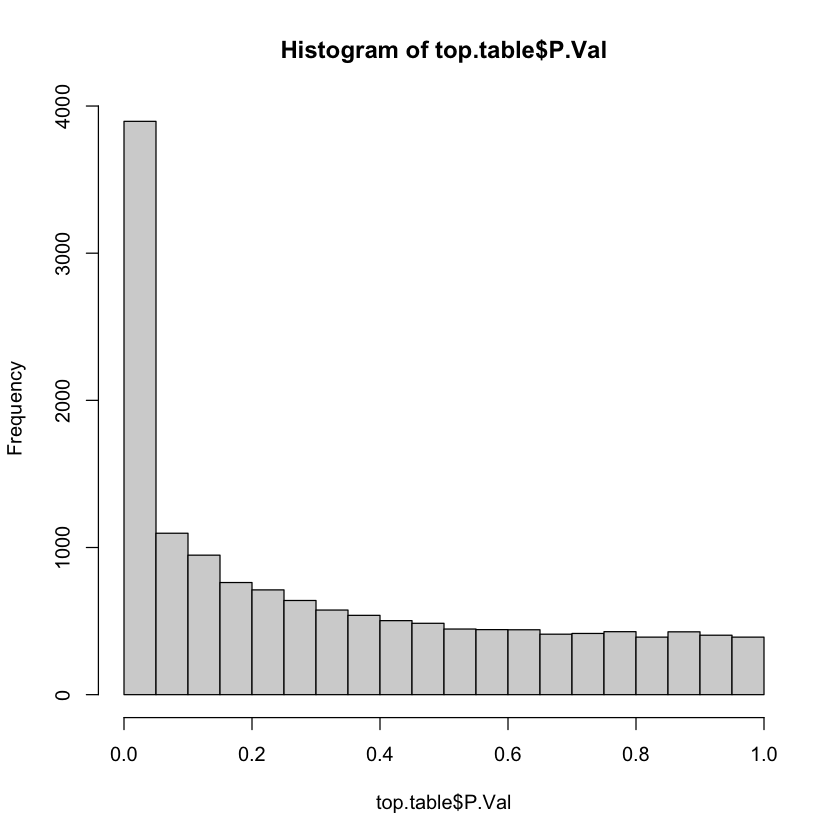

In [8]:
df_tdb_ko_c = contrastFunction(fit_tdb, contrast_group_ko_c)

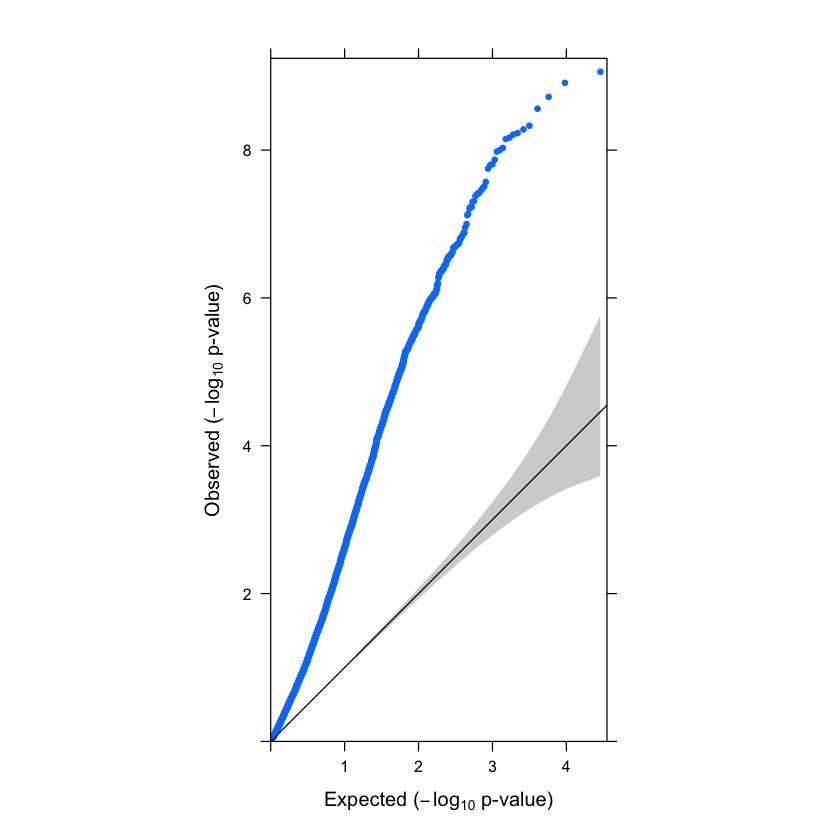

In [9]:
qqunif.plot(df_tdb_ko_c$P.Value)

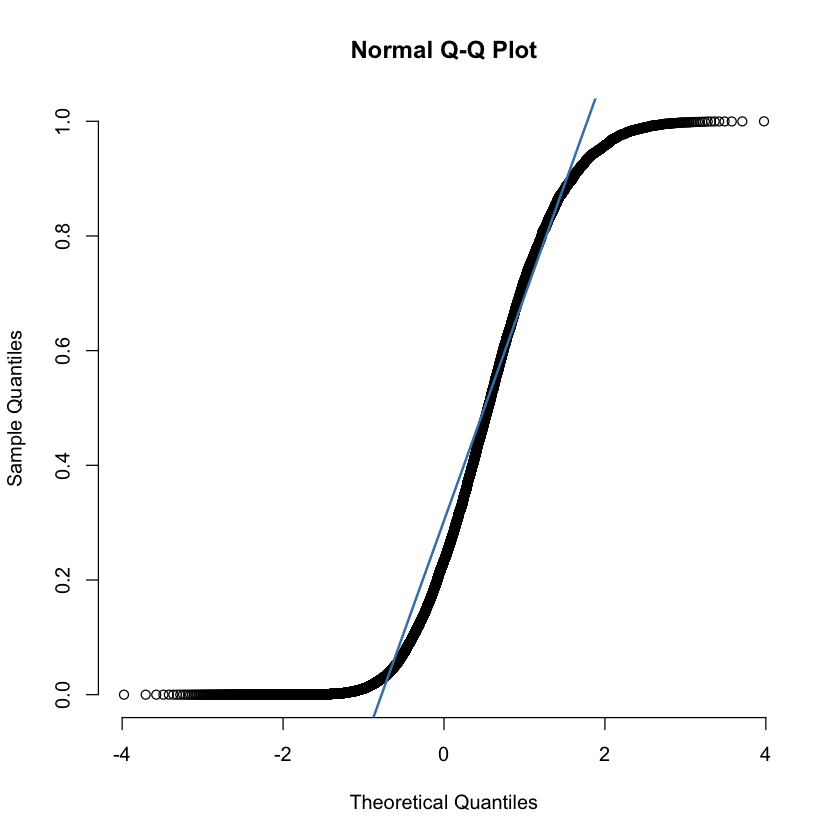

In [14]:
qqnorm(df_tdb_ko_c$P.Value, pch = 1, frame = FALSE)
qqline(df_tdb_ko_c$P.Value, col = "steelblue", lwd = 2)

Warning message:
“ggrepel: 14286 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


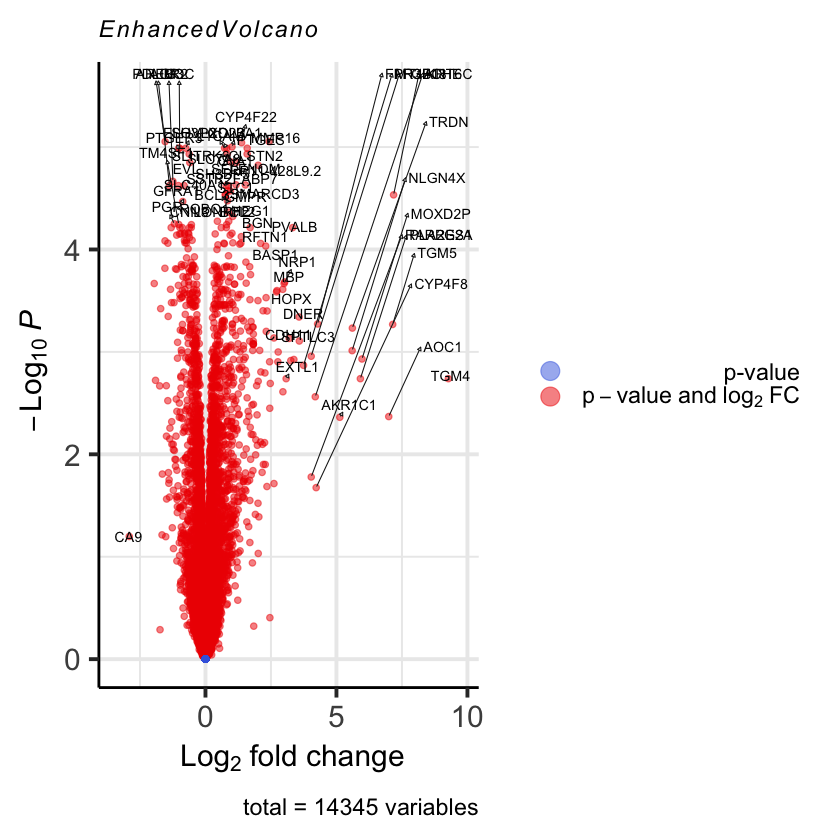

In [15]:
#remove duplicate gene values (most genes have similar logFC. remove lower logFC. for gene CYB561D2, logFC is .2 and -.0711, for RGS5, logFC is -.1461 and .004213093)
#duplicates= df_tdb_ko_c[duplicated(df_tdb_ko_c$gene_name),]
df_tdb_ko_c = df_tdb_ko_c[!duplicated(df_tdb_ko_c$gene_name),]

#save as csv
#write.csv(df_tdb_ko_c, 'df_tdb_ko_c.csv')

plotVolcano(df = df_tdb_ko_c, select_lab = df_tdb_ko_c$gene_name)



In [12]:
#t statistic for gsea
ranked_df = df_tdb_ko_c
ranked_df = within(ranked_df, rank <- ranked_df$t)
ranked_df = ranked_df[,c('gene_name', 'rank')]
ranked_df = ranked_df %>% arrange(rank)
ranked_df = deframe(ranked_df)




#plotGseaTable(h.all_pathway[topPathways_h_all_df], ranked_df, fgseaRes_h_all_df, gseaParam= 1, colwidths = c(17, 3, 2, 2, 2.5))



In [28]:
#c1 hallmark gene set
h.all_pathway = gmtPathways('h.all.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = h.all_pathway)
h.all_pathwayUp = results_list[1]
h.all_pathwayDown = results_list[2]
h.all_pathwayAll = results_list[3]
h.all_pathway_fgseaRes = results_list[4]
print(h.all_pathwayUp)
print(h.all_pathwayDown)
#plotGseaTable(h.all_pathway[h.all_pathwayAll, ranked_df, h.all_pathway_fgseaRes, gseaParam= 1, colwidths = c(17, 3, 2, 2, 2.5))

Warning message in file(con, "r"):
“cannot open file 'h.all.v7.4.symbols.gmt.txt': No such file or directory”


ERROR: Error in file(con, "r"): cannot open the connection


In [17]:
#c2 curated gene sets
c2.all_pathway <- gmtPathways("/Users/lmartin/Documents/2019/RNA_analysis/pathway_analysis/c2.all.v7.1.symbols.gmt")
results_list = gsea_res(ranked_df, pathway_object = c2.all_pathway)
c2.all_pathwayUp = results_list[1]
c2.all_pathwayDown = results_list[2]
c2.all_pathwayAll = results_list[3]
c2.all_pathway_fgseaRes = results_list[4]
print(c2.all_pathwayUp)
print(c2.all_pathwayDown)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


[[1]]
                                                                   pathway
   1:                      CHARAFE_BREAST_CANCER_LUMINAL_VS_MESENCHYMAL_DN
   2:                            CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_DN
   3:                                             LIM_MAMMARY_STEM_CELL_UP
   4:                                              RODWELL_AGING_KIDNEY_UP
   5:                                               LIU_PROSTATE_CANCER_DN
  ---                                                                     
2264:                                              REACTOME_SNRNP_ASSEMBLY
2265: REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
2266:                                                     REACTOME_S_PHASE
2267:                              REACTOME_TRNA_PROCESSING_IN_THE_NUCLEUS
2268:                             SCHLOSSER_MYC_TARGETS_REPRESSED_BY_SERUM
              pval         padj    log2err        ES       NES size
   1: 6.308159e-23 2.22678

In [43]:
fgsea <- fgsea(pathway=c2.all_pathway, stats=ranked_df, minSize=10)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


In [44]:
fgsea

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
ABBUD_LIF_SIGNALING_1_DN,6.743600e-03,0.0427528240,0.40701792,-0.6047946,-1.6967112,18,"CD24, SY...."
ABBUD_LIF_SIGNALING_1_UP,2.809917e-01,0.4480140619,0.11524000,-0.3734219,-1.1460938,25,"MAN1A1, ...."
ABDELMOHSEN_ELAVL4_TARGETS,3.915282e-02,0.1367947719,0.32177592,0.6201733,1.5888857,13,"BCL2, DL...."
ABDULRAHMAN_KIDNEY_CANCER_VHL_DN,4.892368e-01,0.6214614343,0.07913167,-0.4134310,-0.9788878,10,"PALLD, S...."
ABE_INNER_EAR,1.795367e-01,0.3400532942,0.14290115,0.4159045,1.2557069,25,"SELENOM,...."
ABE_VEGFA_TARGETS,1.019159e-02,0.0566526710,0.38073040,0.7043184,1.7430794,11,"SLC4A7, ...."
ABE_VEGFA_TARGETS_2HR,2.866761e-03,0.0233772299,0.43170770,0.6321883,1.8764831,23,"CDKN1A, ...."
ABE_VEGFA_TARGETS_30MIN,1.663202e-01,0.3242723409,0.15524197,0.4795362,1.2640841,15,"DUSP5, R...."
ABRAHAM_ALPC_VS_MULTIPLE_MYELOMA_DN,8.864542e-01,0.9297542281,0.05101141,0.2411764,0.6901163,19,"CDK5, CD...."


In [41]:
res_for_python <- c2.all_pathway_fgseaRes[1][c(1:6)]
res_for_python

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
ABBUD_LIF_SIGNALING_1_DN,1.296270e-02,0.060687443,0.38073040,-0.6047946,-1.7029437,18,"CD24, SY...."
ABBUD_LIF_SIGNALING_1_UP,2.709677e-01,0.435175673,0.12043337,-0.3734219,-1.1357998,25,"MAN1A1, ...."
ABE_INNER_EAR,2.067039e-01,0.367960063,0.12944289,0.4159045,1.2162996,25,"SELENOM,...."
ABE_VEGFA_TARGETS_2HR,1.749159e-03,0.014966447,0.45505987,0.6321883,1.8215003,23,"CDKN1A, ...."
ABE_VEGFA_TARGETS_30MIN,1.852552e-01,0.344547340,0.13880511,0.4795362,1.2461918,15,"DUSP5, R...."
ABRAHAM_ALPC_VS_MULTIPLE_MYELOMA_DN,9.068441e-01,0.947930025,0.04782996,0.2411764,0.6633367,19,"CDK5, CD...."
ABRAHAM_ALPC_VS_MULTIPLE_MYELOMA_UP,2.867925e-01,0.450345800,0.10797236,0.3957467,1.1135416,21,"CCND1, I...."
ABRAMSON_INTERACT_WITH_AIRE,2.334047e-01,0.395164810,0.13077714,-0.3427797,-1.1671611,41,"DDX17, C...."
ACEVEDO_LIVER_CANCER_DN,7.871094e-06,0.000287943,0.59332548,0.3490410,1.6304004,389,"CYP4F22,...."


In [46]:
fwrite(fgsea, "~/Documents/2023/Experimental_RNA_seq/experimental_kmt2c_fgseaRes_c2.csv")

In [ ]:
#c3 regulatory target transcription factor targets
c3.tft_pathway = gmtPathways('c3.tft.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = c3.tft_pathway)
c3.tft_pathwayUp = results_list[1]
c3.tft_pathwayDown = results_list[2]
c3.tft_pathwayAll = results_list[3]
c3.tft_pathway_fgseaRes = results_list[4]
print(c3.tft_pathwayUp)
print(c3.tft_pathwayDown)

In [ ]:
#c5 gene ontology molecular function
c5.go.mf_pathway = gmtPathways('c5.go.mf.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = c5.go.mf_pathway)
c5.go.mf_pathwayUp = results_list[1]
c5.go.mf_pathwayDown = results_list[2]
c5.go.mf_pathwayAll = results_list[3]
c5.go.mf_pathway_fgseaRes = results_list[4]
print(c5.go.mf_pathwayUp)
print(c5.go.mf_pathwayDown)

In [ ]:
#c6 ongogenic signature genesets
c6.all_pathway = gmtPathways('c6.all.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = c6.all_pathway)
c6.all_pathwayUp = results_list[1]
c6.all_pathwayDown = results_list[2]
c6.all_pathwayAll = results_list[3]
c6.all_pathway_fgseaRes = results_list[4]
print(c6.all_pathwayUp)
print(c6.all_pathwayDown)

In [ ]:
#highlight specific genes in volcano plot
#gene_df<- read.csv("geneset_reg_esr1.txt")
df = df_tdb_ko_c
gene_df = h.all_pathway
df_gene_interest = df[(df$gene_name %in% gene_df$HALLMARK_ESTROGEN_RESPONSE_EARLY),]

#make new column with only labels for values in gene_list. use if gene_lsit is list
df$gene_label_interest = df_gene_interest$gene_name[match(df$gene_name, df_gene_interest$gene_name)]

keyvals = ifelse(is.na(df$gene_label_interest), 'royalblue','red')



names(keyvals)[keyvals == 'red'] <- 'interest'
names(keyvals)[keyvals == 'royalblue'] <- 'notinterest'
  
pointsize = c(ifelse(is.na(df$gene_label_interest),.5, 3))
plotVolcano(df = df, select_lab = df$gene_label_interest, title = 'Hallmark_estrogen_response_early',keyvals = keyvals)


In [ ]:


EnhancedVolcano(df_gene_interest, lab = df_gene_interest$gene_name, x = 'logFC', y = 'adj.P.Val',FCcutoff = .001,pCutoff = 1, cutoffLineType = 'blank' ,legendPosition = 'right',drawConnectors =FALSE,widthConnectors = 0.3, pointSize = 1.5, labSize = 3.0, maxoverlapsConnectors = 50)

In [ ]:
plotEnrichment(h.all_pathway[['HALLMARK_ESTROGEN_RESPONSE_EARLY']],ranked_df) + labs(title = 'HALLMARK_ESTROGEN_RESPONSE_EARLY')

In [ ]:
enrichmentplot = function(gsea_pathway, specific_pathway, ranked_dataframe = ranked_df){
  plotEnrichment(gsea_pathway[[specific_pathway]], ranked_dataframe) + labs(title = specific_pathway)
}


In [ ]:
# interest_pathway = h.all_pathwayDown[[1]]$pathway[1]
# enrichmentplot(gsea_pathway = h.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df)

In [ ]:
for (i in 1:10){

  interest_pathway = h.all_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = h.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:5){

  interest_pathway = h.all_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = h.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
c2_up_down_interest = read.csv('c2_up_down_pathways.csv')


c2_interest_list_Up = c2_up_down_interest$c2.up

for (i in 1:length(c2_interest_list_Up)){

  interest_pathway = c2_interest_list_Up[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c2.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
c2_interest_list_Down = c2_up_down_interest$c2.down

for (i in 1:length(c2_interest_list_Down)){

  interest_pathway = c2_interest_list_Down[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c2.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c3.tft_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c3.tft_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c3.tft_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c3.tft_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c5.go.mf_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c5.go.mf_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c5.go.mf_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c5.go.mf_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c6.all_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c6.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c6.all_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c6.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}